<a href="https://colab.research.google.com/github/helioguerrini/Finite-element-solver-in-Python_IsisSophie/blob/main/Treli%C3%A7a_2D_Opensees_basica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openseespy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.7 MB/s eta 0:00:00


In [ ]:
pip install opsvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Carrega os módulos necessários
from openseespy.opensees import *
import opsvis as opsv
import math
import numpy as np
import matplotlib.pyplot as plt

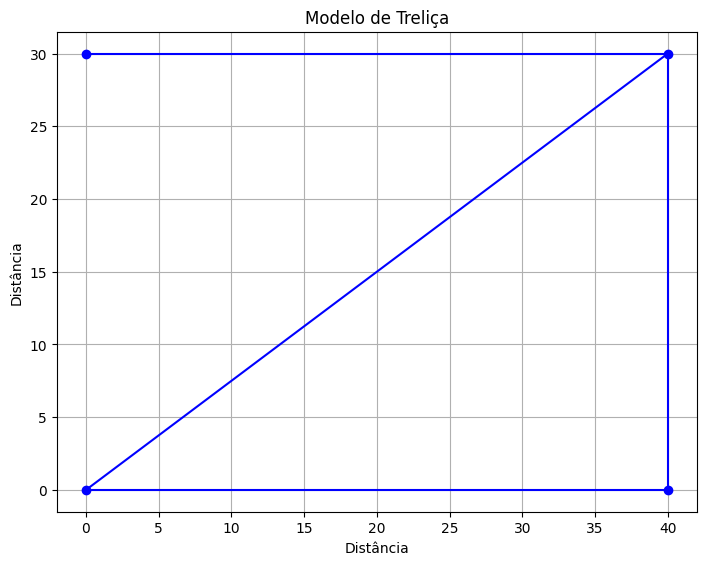

In [ ]:
############## Criação e visualização de geometria #############
################### Tabela de coordenadas nodais ###############
#                                           nó 1    nó 2        nó n
#Tabela de coordenadas nodais = np.array([[x1,y1],[x2,y2],...,[xn,yn]])
nohs = np.array([[0.,0.],[40.,0.],[40.,30.],[0.,30.]])

### Matriz de conectividade - Conexão das Barras da Treliça ###
barras = np.array([[1,2],[2,3],[3,4],[1,3]])

# Visualização do modelo da treliça
fig = plt.figure()
axes = fig.add_axes([0.05,0.05,1,1])
fig.gca().set_aspect('equal', adjustable='box')

#Plot as barras
for brr in barras:
    nohs_i = brr[0] #Número do nó para o nó i deste elemento
    nohs_j = brr[1] #Número do nó para o nó j deste elemento

    ix = nohs[nohs_i-1,0] #Coordenada x do nó i deste elemento.
    iy = nohs[nohs_i-1,1] #Coordenada y do nó i deste elemento.
    jx = nohs[nohs_j-1,0] #Coordenada x do nó j deste elemento.r
    jy = nohs[nohs_j-1,1] #Coordenada y do nó j deste elemento.

    axes.plot([ix,jx],[iy,jy],'b') #Member

#Plot nohs
for n in nohs:
    axes.plot([n[0]],[n[1]],'bo')

axes.set_xlabel('Distância')
axes.set_ylabel('Distância')
axes.set_title('Modelo de Treliça')
axes.grid()
plt.show()


In [ ]:
# Limpa o modelo anterior
wipe()

# Definindo o modelo
model('basic', '-ndm', 2, '-ndf', 2)  # Modelo 2D com 2 graus de liberdade por nó

# Inserção das coordenadas nodais no modelo
for i in range(len(nohs)):
    node(i+1, nohs[i,0], nohs[i,1])

# Definindo propriedades do material (E, área)
E = 29.5e6  # Módulo de elasticidade
A = 1.0  # Área da seção transversal

# Material elástico
uniaxialMaterial('Elastic', 1, E)

# Inserção da conectividade entre as barras no modelo
for idx, barNo in enumerate(barras):
  # Elementos da treliça ('Truss', Barra, nó_i, nó_f, seção A, material)
  element('Truss', idx+1, int(barNo[0]), int(barNo[1]), A, 1)  # Barra 1

# Restrições (nó: tag, ux, uy)
fix(1, 1, 1)  # Nó 1 fixo em x e y
fix(2, 0, 1)  # Nó 2 fixo em y
fix(4, 1, 1)  # Nó 4 fixo em x e y

# Aplicando cargas
timeSeries('Linear', 1)
pattern('Plain', 1, 1)
load(2, 20000.0, 0.0)  # Carga de 12 kN no nó 3 (direção x)
load(3, 0.0, -25000.0)  # Carga de 12 kN no nó 3 (direção x)


# Configurações do analisador
system('BandSPD')  # Solução direta
numberer('Plain')  # Reordenação para eficiência
constraints('Plain')  # Condições de contorno simples
integrator('LoadControl', 1.0)  # Controle de carga estática
algorithm('Linear')  # Linear
analysis('Static')  # Análise estática

# Executando a análise
analyze(1)

0


Deslocamentos dos Nós:
Nó 1: [0.0, 0.0]
Nó 2: [0.027118644067796613, 0.0]
Nó 3: [0.005649717514124292, -0.022245762711864403]
Nó 4: [0.0, 0.0]

Forças axiais nas barras:
Barra 1: Força axial = 20000.0, Tensão normal = 20000.0
Barra 2: Força axial = -21875.0, Tensão normal = -21875.0
Barra 3: Força axial = 4166.6667, Tensão normal = 4166.6667
Barra 4: Força axial = -5208.3333, Tensão normal = -5208.3333



Current Domain Information
	Current Time: 1
	Committed Time: 1
NODE DATA: NumNodes: 4

numComponents: 4

 Node: 1
	Coordinates  : 0 0 
	Disps: 0 0 
	Velocities   : 0 0 
	 unbalanced Load: 0 0 
	ID : -1 -1 


 Node: 2
	Coordinates  : 40 0 
	Disps: 0.0271186 0 
	Velocities   : 0 0 
	 unbalanced Load: 20000 0 
	ID : 0 -1 


 Node: 3
	Coordinates  : 40 30 
	Disps: 0.00564972 -0.0222458 
	Velocities   : 0 0 
	 unbalanced Load: 0 -25000 
	ID : 1 2 


 Node: 4
	Coordinates  : 0 30 
	Disps: 0 0 
	Velocities   : 0 0 
	 unbalanced Load: 0 0 
	ID : -1 -1 

ELEMENT DATA: NumEle: 4

numComponents: 4
Element: 1 type: Truss  iNode: 1 jNode: 2 Area: 1 Mass/Length: 0 cMass: 0 
	 strain: 0.000677966 axial load: 20000 
	 unbalanced load: -20000 -0 20000 0 
 	 Material: 
Element: 2 type: Truss  iNode: 2 jNode: 3 Area: 1 Mass/Length: 0 cMass: 0 
	 strain: -0.000741525 axial load: -21875 
	 unbalanced load: 0 21875 -0 -21875 
 	 Material: 
Element: 3 type: Truss  iNode: 3 jNode: 4 Area: 1 Mass/Length: 0 cMa

147.49999999999997

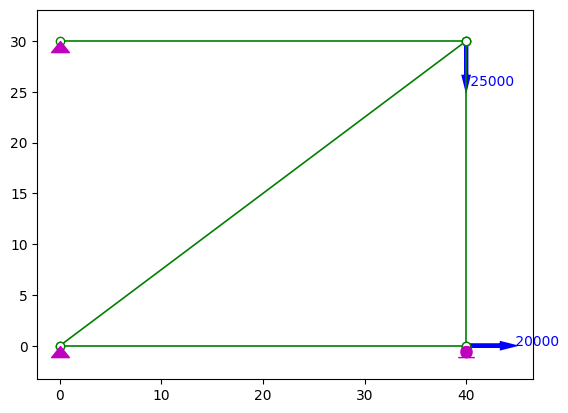

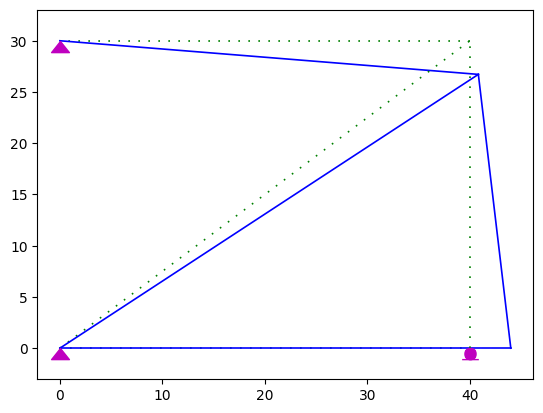

In [ ]:
# Resultados
print("\nDeslocamentos dos Nós:")
for i in range(1, len(nohs)+1):
    print(f"Nó {i}: {nodeDisp(i)}")  # Deslocamentos nos nós

print("\nForças axiais nas barras:")
for i in range(1, len(barras)+1):
    x1, y1 = nodeCoord(int(barras[i-1][0]))
    x2, y2 = nodeCoord(int(barras[i-1][1]))
    theta = math.atan2(y2 - y1, x2 - x1)
    forces = eleResponse(i, 'force')
    Faxial = (math.cos(theta))*forces[2] + (math.sin(theta))*forces[3]
    print(f"Barra {i}: Força axial = {round(Faxial,4)}, Tensão normal = {round((Faxial/A),4)}")
    #print(f"Barra {i}: f1x = {forces[0]} N, f1y = {forces[1]} N, f2x = {forces[2]} N, f2y = {forces[3]} N")
print()
printModel()
opsv.plot_load()
opsv.plot_defo()